In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("new_pred.csv")

In [4]:
df.head()

,Job Profile,Company,ExperienceRequired,AvgSalary
0,Scientist,reliance-nippon-life-insurance,5.5,581665
1,Branch Manager,dcb-bank,8.0,604018
2,Team Lead Operations,itc,5.0,347114
3,QC Officer,lifestyle,7.5,408028
4,Junior Engineer,reckitt-benckiser,12.0,316633


In [5]:
df.duplicated().sum()

0

In [6]:
for i in df.columns:
    display(df[i].unique())
    print(".....................")

array(['Scientist', 'Branch Manager', 'Team Lead Operations', ...,
       'Operation Staff', 'Technology Analyst',
       'Senior Process Data Engineer'], dtype=object)

.....................


array(['reliance-nippon-life-insurance', 'dcb-bank', 'itc', 'lifestyle',
       'reckitt-benckiser', 'siemens', 'bt-global-services',
       'nokia-networks', 'indian-oil-corporation', 'exide-life-insurance',
       'au-small-finance-bank', 'wns', 'arcelormittal-nippon-steel',
       'exotic-learning', 'capgemini-engineering', 'fullerton-india',
       'indusind-bank', 'tvs-credit', 'samvardhana-motherson-group',
       'dalmia-bharat-cement', 'sobha', 'jubilant-foods-works', 'cisco',
       'tractors-and-farm-equipment', 'tata-motors-finance',
       '3i-infotech', 'cams', 'intelenet-global-services',
       'icici-prudential-life-insurance', 'icici-bank', 'infosys',
       'poonawalla-fincorp', 'ford-motor', 'dilip-buildcon', 'metro',
       'bank-of-america', 'act-fibernet',
       'wipro-consumer-care-&-lighting', 'iks-health', 'jsw-steel',
       'asian-paints', 'synechron', 'lenskart', 'sify-technologies',
       'ust', 'ntt-data', 'xl-dynamics',
       'cg-power-and-industrial-s

.....................


array([ 5.5,  8. ,  5. ,  7.5, 12. ,  3. ,  6.5,  3.5,  4. ,  9. , 10.5,
        4.5,  9.5,  2.5,  2. , 14. ,  8.5,  7. ,  6. , 17. , 29.5, 16.5,
        1.5, 12.5, 14.5,  1. , 21. , 15. ,  0.5, 18.5, 18. , 10. , 11.5,
       13.5, 11. , 31. , 13. , 20.5, 16. , 19.5, 17.5, 15.5, 22. , 23. ,
       19. , 21.5, 25. , 23.5, 22.5, 28. , 25.5, 20. , 31.5])

.....................


array([581665, 604018, 347114, ..., 491565, 708817, 429423], dtype=int64)

.....................


In [7]:
for i in df.columns:
    display(df[i].value_counts())
    print(".....................")

Sales Executive                      139
Deputy Manager                       138
Team Lead                            125
Software Engineer                    104
Senior Software Engineer              94
                                    ... 
Human Resource Business Associate      1
LIC Advisor                            1
Title Specialist                       1
Mechanical Technician                  1
Senior Process Data Engineer           1
Name: Job Profile, Length: 1274, dtype: int64

.....................


reliance-nippon-life-insurance    10
fis                               10
gabriel-india                     10
hindustan-coca-cola-beverages     10
v-mart                            10
                                  ..
tvs-sundram-fasteners             10
hdfc-sales                        10
wells-fargo                       10
aditya-birla-capital              10
oberoi-group-of-hotels            10
Name: Company, Length: 500, dtype: int64

.....................


3.0     478
4.0     472
3.5     406
5.0     353
4.5     341
2.5     314
5.5     284
6.0     263
6.5     253
2.0     212
7.5     185
7.0     170
8.0     127
1.5     122
8.5     115
10.0    106
9.5      93
9.0      89
10.5     76
12.0     72
11.0     65
1.0      59
11.5     47
12.5     46
13.0     43
0.5      38
13.5     32
14.0     29
16.0     14
15.5     13
15.0     11
14.5     11
17.5      9
17.0      8
16.5      5
19.5      5
18.0      4
18.5      4
21.0      3
20.5      3
31.0      3
29.5      2
22.0      2
23.0      2
19.0      2
20.0      2
21.5      1
25.0      1
23.5      1
22.5      1
28.0      1
25.5      1
31.5      1
Name: ExperienceRequired, dtype: int64

.....................


350089     2
714189     2
420839     2
342907     2
440749     2
          ..
339030     1
1544974    1
326884     1
454391     1
429423     1
Name: AvgSalary, Length: 4955, dtype: int64

.....................


In [8]:
df.describe()

,ExperienceRequired,AvgSalary
count,5000.000000,5.000000e+03
mean,5.698700,6.837694e+05
std,3.466623,6.313453e+05
min,0.500000,1.162270e+05
25%,3.500000,3.034535e+05
50%,5.000000,4.520035e+05
75%,7.000000,8.032802e+05
max,31.500000,7.591845e+06


<Axes: >

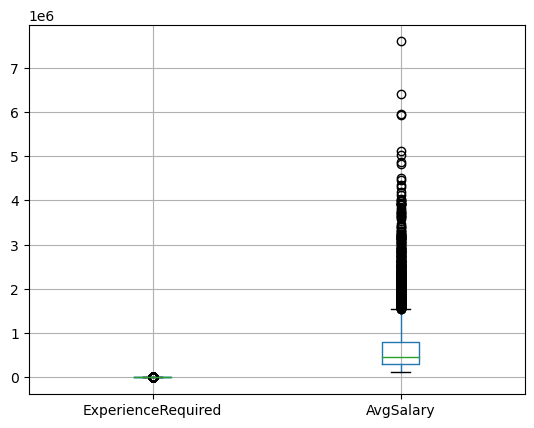

In [9]:
df.boxplot()

In [10]:
df.shape

(5000, 4)

In [11]:
from scipy import stats

Q1_exp = df['ExperienceRequired'].quantile(0.25)
Q3_exp = df['ExperienceRequired'].quantile(0.75)
IQR_exp = stats.iqr(df['ExperienceRequired'])

Q1_sal = df['AvgSalary'].quantile(0.25)
Q3_sal = df['AvgSalary'].quantile(0.75)
IQR_sal = stats.iqr(df['AvgSalary'])

# Define the range within which data points are considered normal
lower_exp = Q1_exp - 1.5 * IQR_exp
upper_exp = Q3_exp + 1.5 * IQR_exp

lower_sal = Q1_sal - 1.5 * IQR_sal
upper_sal = Q3_sal + 1.5 * IQR_sal

# Remove outliers
df_cleaned = df[(df['ExperienceRequired'] >= lower_exp) & (df['ExperienceRequired'] <= upper_exp) &
                (df['AvgSalary'] >= lower_sal) & (df['AvgSalary'] <= upper_sal)]

In [12]:
print(lower_exp,upper_exp)
print(lower_sal,upper_sal)

-1.75 12.25
-446286.625 1553020.375


In [13]:
df_cleaned.boxplot()

<Axes: >

In [14]:
df.isnull().sum()

Job Profile           0
Company               0
ExperienceRequired    0
AvgSalary             0
dtype: int64

In [15]:
df = df_cleaned

In [16]:
df.nunique()

Job Profile           1147
Company                498
ExperienceRequired      24
AvgSalary             4342
dtype: int64

# target ordinal

In [17]:
target_ordinal_company = df.groupby('Company')['AvgSalary'].mean().to_dict()

In [18]:
df['Company'] = df['Company'].map(target_ordinal_company)

In [19]:
target_ordinal_job = df.groupby('Job Profile')['AvgSalary'].median().to_dict()

In [20]:
df['Job Profile'] = df['Job Profile'].map(target_ordinal_job)

In [21]:
df.head()

,Job Profile,Company,ExperienceRequired,AvgSalary
0,640159.5,522703.400000,5.5,581665
1,396482.0,411656.777778,8.0,604018
2,366696.0,363407.900000,5.0,347114
3,488615.0,490765.400000,7.5,408028
4,528026.0,489330.400000,12.0,316633


In [22]:
X = df.drop('AvgSalary', axis=1)
y = df['AvgSalary']

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler2.fit_transform(y.values.reshape(-1,1))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [25]:
X_train.shape , X_test.shape , y_train.shape,y_test.shape

((3505, 3), (877, 3), (3505, 1), (877, 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='linear', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1,activation='linear')
])

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [27]:
model.fit(X_train, y_train, epochs=100, batch_size=60, verbose=1)

Epoch 1/100
59/59 [==============================] - 2s 14ms/step - loss: 0.5312 - mean_absolute_error: 0.5312
Epoch 2/100
59/59 [==============================] - 1s 14ms/step - loss: 0.4947 - mean_absolute_error: 0.4947
Epoch 3/100
59/59 [==============================] - 1s 14ms/step - loss: 0.4990 - mean_absolute_error: 0.4990
Epoch 4/100
59/59 [==============================] - 1s 14ms/step - loss: 0.4867 - mean_absolute_error: 0.4867
Epoch 5/100
59/59 [==============================] - 1s 14ms/step - loss: 0.4919 - mean_absolute_error: 0.4919
Epoch 6/100
59/59 [==============================] - 1s 15ms/step - loss: 0.4921 - mean_absolute_error: 0.4921
Epoch 7/100
59/59 [==============================] - 1s 15ms/step - loss: 0.4879 - mean_absolute_error: 0.4879
Epoch 8/100
59/59 [==============================] - 1s 15ms/step - loss: 0.4872 - mean_absolute_error: 0.4872
Epoch 9/100
59/59 [==============================] - 1s 15ms/step - loss: 0.4870 - mean_absolute_error: 0.4870
E

59/59 [==============================] - 1s 22ms/step - loss: 0.4625 - mean_absolute_error: 0.4625
Epoch 75/100
59/59 [==============================] - 1s 23ms/step - loss: 0.4586 - mean_absolute_error: 0.4586
Epoch 76/100
59/59 [==============================] - 1s 22ms/step - loss: 0.4610 - mean_absolute_error: 0.4610
Epoch 77/100
59/59 [==============================] - 1s 22ms/step - loss: 0.4577 - mean_absolute_error: 0.4577
Epoch 78/100
59/59 [==============================] - 1s 20ms/step - loss: 0.4587 - mean_absolute_error: 0.4587
Epoch 79/100
59/59 [==============================] - 1s 21ms/step - loss: 0.4558 - mean_absolute_error: 0.4558
Epoch 80/100
59/59 [==============================] - 1s 20ms/step - loss: 0.4601 - mean_absolute_error: 0.4601
Epoch 81/100
59/59 [==============================] - 1s 20ms/step - loss: 0.4544 - mean_absolute_error: 0.4544
Epoch 82/100
59/59 [==============================] - 1s 20ms/step - loss: 0.4566 - mean_absolute_error: 0.4566
Epoch

In [29]:
loss = model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 4ms/step - loss: 0.4901 - mean_absolute_error: 0.4901


In [31]:
df.iloc[0].tolist()[-1]

581665.0

In [30]:
df.iloc[0].tolist()[:-1]

[640159.5, 522703.4, 5.5]

In [32]:
scaler2.inverse_transform(model.predict(scaler.transform([df.iloc[0].tolist()[:-1]]))[0][0].reshape(-1,1))

C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step


array([[621609.6]], dtype=float32)

In [33]:
model.predict(scaler.transform([df.iloc[0].tolist()[:-1]]))

1/1 [==============================] - 0s 22ms/step


C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.31135416]], dtype=float32)

# Model Training

In [34]:
import xgboost as xgb

# Create the XGBoost regression model
xgb_model = xgb.XGBRegressor()


In [35]:
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.6619954884425967
R-squared: 0.3274619961061691


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (Linear Regression):", mse_linear)
print("R-squared (Linear Regression):", r2_linear)


Mean Squared Error (Linear Regression): 0.5297824019986338
R-squared (Linear Regression): 0.461780623344632


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (Random Forest):", r2_rf)


C:\Users\Atul kishore\AppData\Local\Temp\ipykernel_3192\1577295802.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Mean Squared Error (Random Forest): 0.5970143594951524
R-squared (Random Forest): 0.3934779728251273


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test data using the best model
y_pred_rf_tuned = grid_search.predict(X_test)

# Evaluate the tuned model
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("Mean Squared Error (Random Forest - Tuned):", mse_rf_tuned)
print("R-squared (Random Forest - Tuned):", r2_rf_tuned)


C:\anaconda\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (Random Forest - Tuned): 0.5542054522456097
R-squared (Random Forest - Tuned): 0.4369686272678277


In [40]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the SVM regression model
svm_model = SVR(kernel='linear')  # Radial Basis Function (RBF) kernel is commonly used for SVM regression

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Mean Squared Error (SVM):", mse_svm)
print("R-squared (SVM):", r2_svm)


C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (SVM): 0.5625857330392467
R-squared (SVM): 0.42845488749857064


In [41]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.2, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly']}

# Create the SVM regression model
svm_model = SVR()

# Create GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_svm_model = grid_search.best_estimator_
y_pred_svm_tuned = best_svm_model.predict(X_test)

# Evaluate the tuned model
mse_svm_tuned = mean_squared_error(y_test, y_pred_svm_tuned)
r2_svm_tuned = r2_score(y_test, y_pred_svm_tuned)

print("Mean Squared Error (SVM - Tuned):", mse_svm_tuned)
print("R-squared (SVM - Tuned):", r2_svm_tuned)


C:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Mean Squared Error (SVM - Tuned): 0.5342248649686426
R-squared (SVM - Tuned): 0.45726741255938796


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the Gradient Boosting regression model
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)
print("R-squared (Gradient Boosting):", r2_gb)


C:\anaconda\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (Gradient Boosting): 0.5487440782683756
R-squared (Gradient Boosting): 0.44251697558332415


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting regression model
gb_model = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Ensure y_train is a 1D array
y_train_1d = y_train.ravel()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train_1d)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Predict on the test data using the best model
y_pred_gb_tuned = grid_search.predict(X_test)

# Evaluate the tuned model
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
r2_gb_tuned = r2_score(y_test, y_pred_gb_tuned)

print("Mean Squared Error (Gradient Boosting - Tuned):", mse_gb_tuned)
print("R-squared (Gradient Boosting - Tuned):", r2_gb_tuned)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error (Gradient Boosting - Tuned): 0.5467666665701432
R-squared (Gradient Boosting - Tuned): 0.44452587827167056


# Evaluation on test data

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test contains the actual target values for the test set
# and y_pred_rf contains the predicted values by the Random Forest model

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Mean Squared Error (Random Forest):", mse_rf)
print("R-squared (Random Forest):", r2_rf)


Mean Squared Error (Random Forest): 0.5970143594951524
R-squared (Random Forest): 0.3934779728251273


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test contains the actual target values for the test set
# and y_pred_rf_tuned contains the predicted values by the tuned Random Forest model

# Evaluate the tuned model on the test data
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

# Print the evaluation metrics for the tuned model
print("Mean Squared Error (Random Forest - Tuned):", mse_rf_tuned)
print("R-squared (Random Forest - Tuned):", r2_rf_tuned)


Mean Squared Error (Random Forest - Tuned): 0.5542054522456097
R-squared (Random Forest - Tuned): 0.4369686272678277


In [46]:
import pickle


In [47]:
with open('random_forest_tuned_model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)